# Superposition d'écoulements
Avec ce TP numérique, nous allons implémenter les écoulements vus en classe et construire des écoulements plus complexe grace au prinicipe de superposition.

## Objectifs de la séance
Comprendre le lien pression, vitesse et la generation de la portance sur une forme


**NB**: Notez que pour se simplifier la programmation, on n'utilisera pas d'incidence dans le TD d'aujourd'hui. 

### Modules python et paramètres pour les graphiques
En plus des modules de base, nous utiliserons un module personnel pour implémenter les formules vues en classe et superposer facilement les écoulements.  
**Attention** Si vous modifiez le module `banque_ecoulement.py`, vous devez recharger le module après avoir redémarré le noyau `kernel`. Vous pouvez utiliser la commande `Restart Kernel and Run up to Selected Cell` dans le menu `Kernel`

In [1]:
import numpy as np
import module.banque_ecoulements as bq
import module.helper_plot_ecoulement as pl
pl.set_nice_plot_params()
Ncontours = 25

### Exercice 1 - Comprendre le fonctionnement du module

1. Ouvrez le fichier `banque_ecoulement.py` et essayer de comprendre l'utilisation qui en est faite ci-dessous. 
2. Des fonctions de tracés sont proposées dans le module `helper_plot_ecoulement.py`. Regardez l'usage qui en est fait comme illustration et utilisez la commande `help(pl.<fonction>)` pour obtenir de l'aide.
  * `pl.plot_contours_phi_psi`
  * `pl.plot_lignes_courant`
  * `pl.plot_champs`

3. Modifiez les paramètres de définitions de la grille ou de l'écoulement
4. Lorsque vous êtes suffisamment initié, complétez les écoulements de la banque en éditant le fichier `banque_ecoulement.py` et testez les ! 

In [2]:
grid = bq.create_2Dgrid_cart()

In [3]:
Vinf = 2.0
L = 5.0
d0 = 0.2

In [4]:
unif = bq.uniform(grid,Vinf)
source = bq.source(grid,L,center=[-d0,0.])
src_unif = bq.superpose_ecoulement(unif,source,grid)

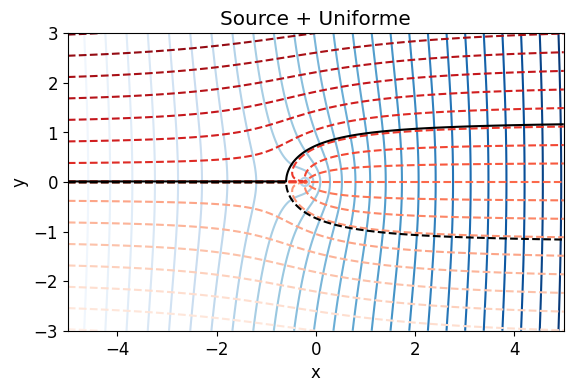

In [5]:
pl.plot_contours_phi_psi(grid,src_unif,titre='Source + Uniforme',Ncontours=Ncontours,isoPsi=[-L/2,L/2.])

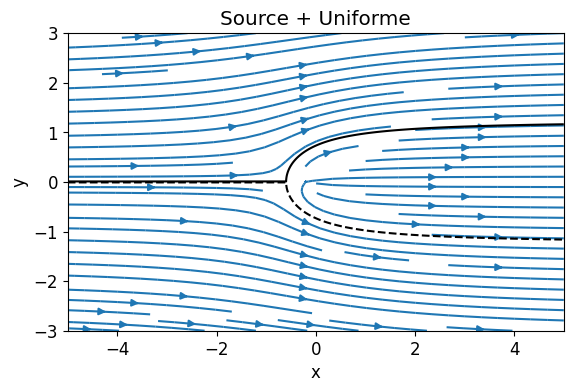

In [6]:
pl.plot_lignes_courant(grid,src_unif,titre='Source + Uniforme',isoPsi=[-L/2,L/2.])

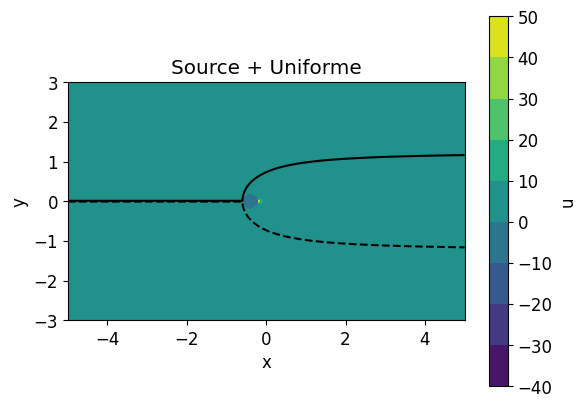

In [7]:
pl.plot_champs(grid,src_unif,'u',titre='Source + Uniforme',isoPsi=[-L/2,L/2.])

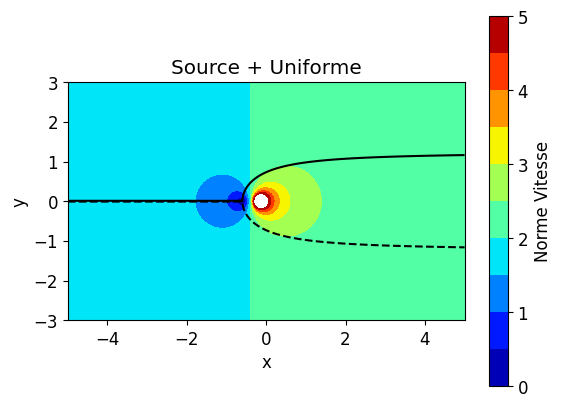

In [8]:
pl.plot_champs(grid,src_unif,np.sqrt(src_unif['u']**2+src_unif['v']**2),
               titre='Source + Uniforme',isoPsi=[-L/2,L/2.],legend='Norme Vitesse',range=[0.,5.0])

### Exercice 2 - Écoulement autour d'un cylindre
1. Créez un écoulement de vitesse $V_\infty=2.0\text{ m}$ autour d'un cylindre de rayon $R_0=0.5 \text{ m}$. Il n'y a pas de circulation. 
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créez une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle. 

### Exercice 3 - Écoulement autour d'un cylindre avec circulation et forces aérodynamiques exercées sur le cylindre
1. Ajoutez une circulation $\Gamma$ à cet écoulement.
2. Visualisez les lignes de courant et les lignes potentielles.
3. Visualisez le champ de vitesse et le champ de pression.
4. Créer une grille correspondant à la surface du cylindre et évaluez l'écoulement sur cette grille.
5. Rappellez les expressions des forces aérodynamiques $L^\prime$ et $D^\prime$ exercées sur le cylindre, puis déterminez les expressions des coefficients de portance $c_\ell$ et de trainée $c_d$ sur le cylindre en fonction du coefficient de pression $C_p$.
6. Tracez la norme de la vitesse et le coefficient de pression $C_p$ sur la peau du cercle.
7. Calculez les coefficients aérodynamiques $L^\prime$ et $D^\prime$ en utilisant l'intégration numérique de la méthode des trapèzes fournie par la fonction `np.trapz`.
8. et comparez avec les expressions théoriques en
9. Faites varier l'intensité de la circulation et reprennez les étapes précédentes.
